In this notebook, we will demonstrate how `TableAutomization.py` can be used for different distributions, in this case the `banana` distribution provided by the cuqipy package.
Please note that a previous read on the `table-donut.ipynb` is suggested, as that notebook provides more detailed explanations on `TableAutomization.py`; moreover, there are comparisons between the two notebooks.

### Importing the needed libraries 

In [1]:
import cuqi
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
import utilities 
import benchmarksClass as BC 


# The banana distribution


In [2]:
# The banana distribution 
target_banana = BC.Banana()


### Plotting the "banana"

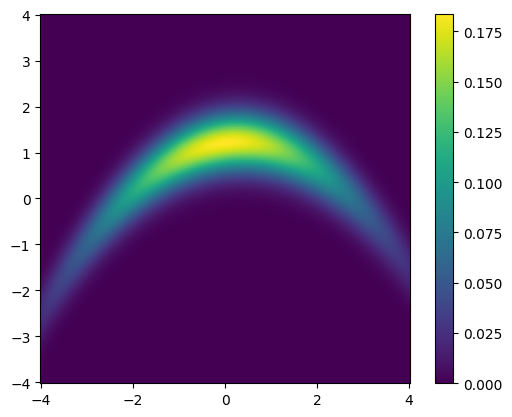

In [3]:
utilities.Plot(target_banana).plot_pdf_2D(-4, 4, -4, 4)


- Compute sampling methods

In [4]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [5]:
samples = utilities.MCMCComparison(target_banana, [1.0, 1.0, 0.065, 0.5, 0.1], 8500, 1500, x0 = y, seed = 12, chains=4)

In [6]:
samples.create_comparison()

/opt/conda/envs/env/lib/python3.10/site-packages/cuqi/experimental/mcmc/_sampler.py:13: UserWarning: Module mcmc: Progressbar not found. Install progressbar2 to get sampling progress.
  warnings.warn("Module mcmc: Progressbar not found. Install progressbar2 to get sampling progress.")
/opt/conda/envs/env/lib/python3.10/site-packages/cuqi/experimental/mcmc/_sampler.py:13: UserWarning: Module mcmc: Progressbar not found. Install progressbar2 to get sampling progress.
  warnings.warn("Module mcmc: Progressbar not found. Install progressbar2 to get sampling progress.")


,MH,CWMH,ULA,MALA,NUTS
samples,8500,8500,8500,8500,8500
burnins,1500,1500,1500,1500,1500
scale,1.0,1.0,0.065,0.5,-
ESS(v0),190.945,46.069,34.643,91.406,868.884
ESS(v1),245.282,62.05,61.713,256.58,344.878
AR,0.374,0.615,1.0,0.512,0.911
LogPDF,10002,20002,10002,10002,80520
Gradient,0,0,10002,10002,80520
Rhat(v0),1.008,1.035,1.006,1.013,1.002
Rhat(v1),1.0,1.027,1.001,1.006,1.003


Observations:
- the  MH_fixed performs quite poorly, as ESS is very low, RHat strays from 1 and the AR is too high
- however, unlike in the donut distribution, the MH_adapted, performs better than expected, with Rhat close to 1.0 (converges well) and ESS, especially ESS(v1), is quite high 
- ULA has acceptence rate AR=1.0, as expected, and it performs well, with ESS parameters not too high but higher than MH, also R_hat is close to 1, meaing that it converges well enough
- MALA performs decently, but NUTS outperforms all the methods, but the computational costs are at least 4 times higher

- Create distribution images  

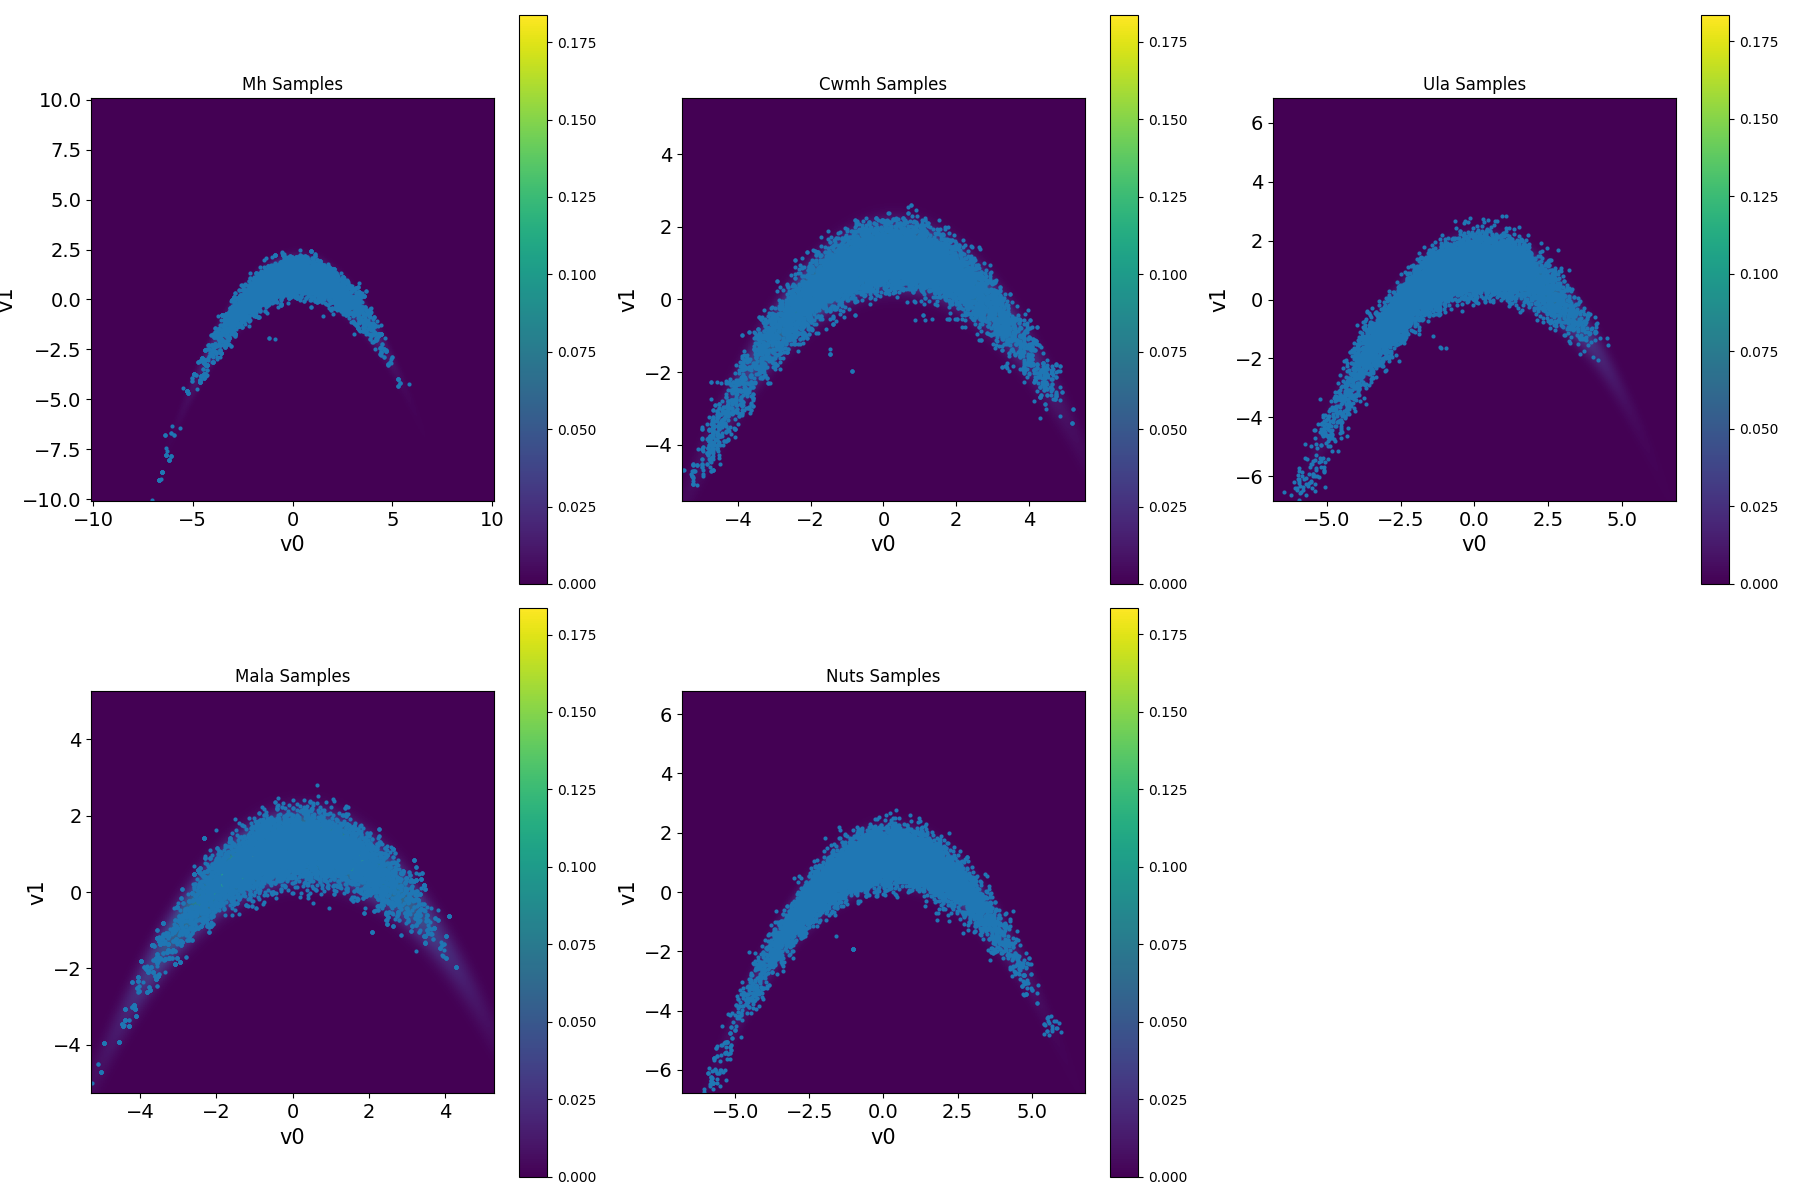

(<Figure size 1800x1200 with 10 Axes>,
 array([<Axes: title={'center': 'Mh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Cwmh Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Ula Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Mala Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: title={'center': 'Nuts Samples'}, xlabel='v0', ylabel='v1'>,
        <Axes: >], dtype=object))

In [7]:
samples.create_plt()

_Observations_
- as expected the MH_fixed stays quite close to the initial point  
- compared to the previous graphss,it can be seen that setting a relatively high number of burn ins will lead to better results 